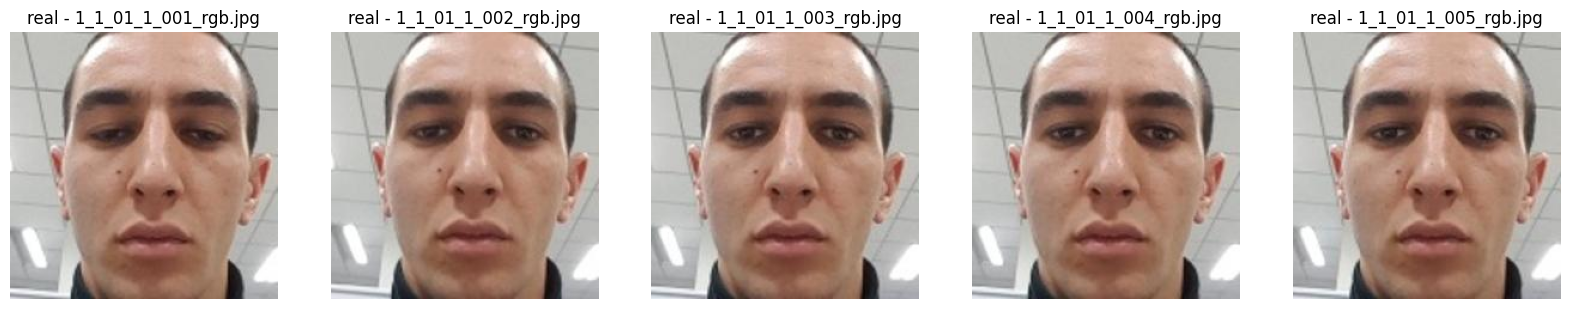

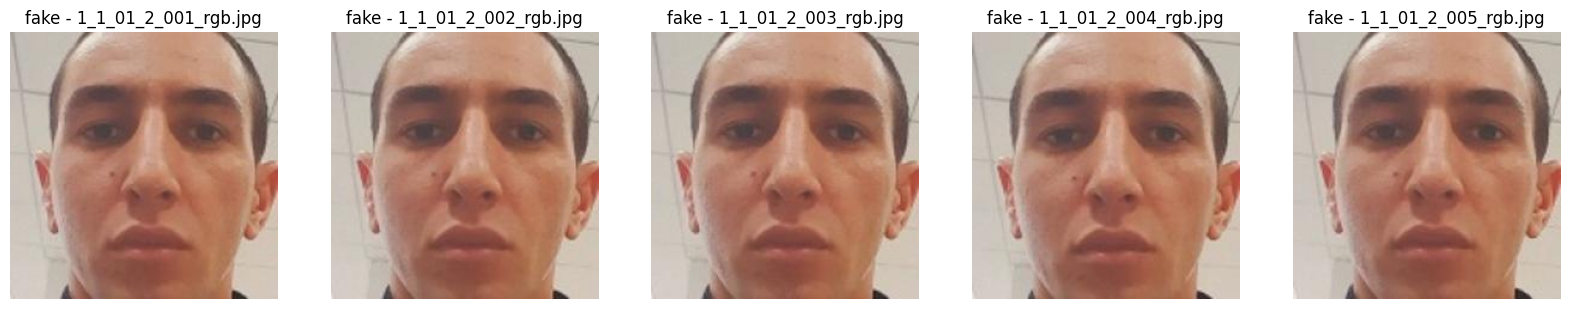

Training set distribution: {'real': 3837, 'fake': 13750}
Test set distribution: {'real': 609, 'fake': 2257}
Development set distribution: {'real': 2774, 'fake': 9805}


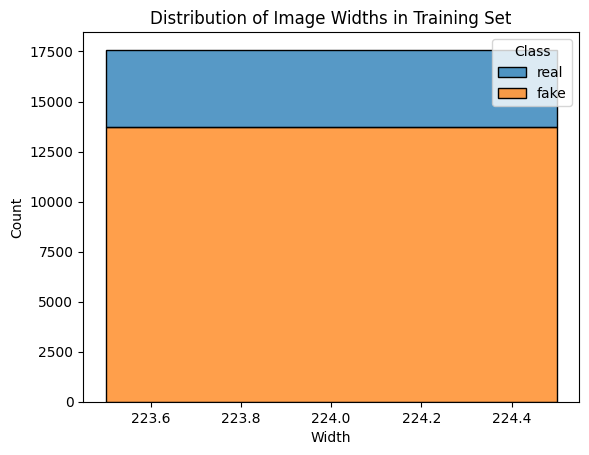

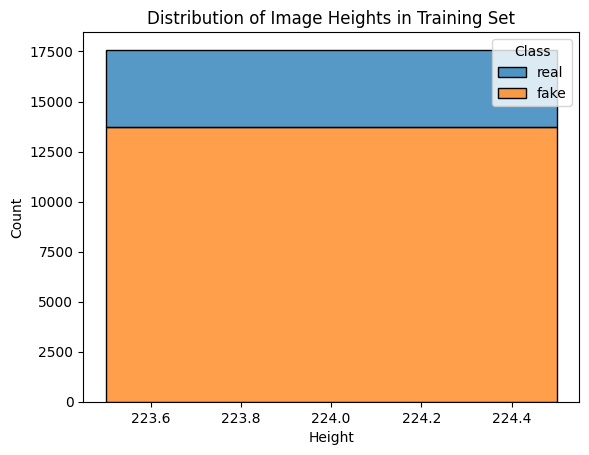

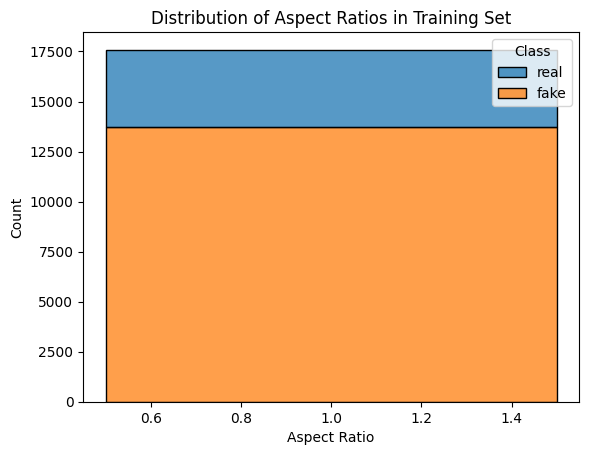

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import pandas as pd

# Define the directories for the datasets
train_dir = 'train'
test_dir = 'test'
dev_dir = 'dev'

# Function to visualize some images from the dataset
def visualize_images(dataset_dir, class_name, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 10))
    images = os.listdir(os.path.join(dataset_dir, class_name))
    
    for i, img_name in enumerate(images[:num_images]):
        img_path = os.path.join(dataset_dir, class_name, img_name)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'{class_name} - {img_name}')
    
    plt.show()

# Function to analyze the class distribution
def class_distribution(dataset_dir):
    class_counts = {}
    
    for class_name in ['real', 'fake']:
        class_dir = os.path.join(dataset_dir, class_name)
        class_counts[class_name] = len(os.listdir(class_dir))
    
    return class_counts

# Function to analyze image properties
def analyze_image_properties(dataset_dir):
    properties = {'Width': [], 'Height': [], 'Aspect Ratio': [], 'Class': []}
    
    for class_name in ['real', 'fake']:
        class_dir = os.path.join(dataset_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                width, height = img.size
                aspect_ratio = width / height
                properties['Width'].append(width)
                properties['Height'].append(height)
                properties['Aspect Ratio'].append(aspect_ratio)
                properties['Class'].append(class_name)
    
    return pd.DataFrame(properties)

# Visualize some images from each class
visualize_images(train_dir, 'real')
visualize_images(train_dir, 'fake')

# Analyze class distribution
train_distribution = class_distribution(train_dir)
test_distribution = class_distribution(test_dir)
dev_distribution = class_distribution(dev_dir)

print("Training set distribution:", train_distribution)
print("Test set distribution:", test_distribution)
print("Development set distribution:", dev_distribution)

# Analyze image properties
train_properties = analyze_image_properties(train_dir)
test_properties = analyze_image_properties(test_dir)
dev_properties = analyze_image_properties(dev_dir)

# Plotting the distributions of widths and heights
sns.histplot(data=train_properties, x='Width', hue='Class', multiple='stack')
plt.title('Distribution of Image Widths in Training Set')
plt.show()

sns.histplot(data=train_properties, x='Height', hue='Class', multiple='stack')
plt.title('Distribution of Image Heights in Training Set')
plt.show()

# Plotting the distribution of aspect ratios
sns.histplot(data=train_properties, x='Aspect Ratio', hue='Class', multiple='stack')
plt.title('Distribution of Aspect Ratios in Training Set')
plt.show()


In [2]:
import os
from PIL import Image
from skimage import io
import hashlib

def remove_corrupt_images(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = io.imread(filepath)
            except IOError:
                print(f"Removing corrupt image: {filepath}")
                os.remove(filepath)

def standardize_image_size(directory, size=(224, 224)):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)
                img = img.resize(size)
                img.save(filepath)
            except IOError as e:
                print(f"Error processing image {filepath}: {e}")

def remove_duplicate_images(directory):
    unique_hashes = set()
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)
                hash_digest = hashlib.md5(img.tobytes()).hexdigest()
                if hash_digest in unique_hashes:
                    print(f"Removing duplicate image: {filepath}")
                    os.remove(filepath)
                else:
                    unique_hashes.add(hash_digest)
            except IOError as e:
                print(f"Error processing image {filepath}: {e}")




In [3]:
# Paths to your main directories
train_dir = 'train'
test_dir = 'test'
dev_dir = 'dev'

# Run the cleaning functions on each directory
for directory in [train_dir, dev_dir]:
    print(f"Cleaning directory: {directory}")
    remove_corrupt_images(directory)
    standardize_image_size(directory)
    remove_duplicate_images(directory)


Cleaning directory: train
Cleaning directory: dev
